样本点


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以保证结果可复现
np.random.seed(42)

# 生成100个二维样本点（X）和对应的目标值（y）
num_samples = 100
X = np.random.rand(num_samples)  # 100个样本点，每个点有两个特征


y=  3  * X + np.random.randn(num_samples)
data=np.hstack((X.reshape(-1,1),y.reshape(-1,1)))
data


array([[ 0.37454012,  1.21066742],
       [ 0.95071431,  2.55313557],
       [ 0.73199394,  2.2877426 ],
       [ 0.59865848, -0.19159346],
       [ 0.15601864,  0.24838403],
       [ 0.15599452,  0.82509613],
       [ 0.05808361,  1.65214488],
       [ 0.86617615,  2.08025822],
       [ 0.60111501,  0.99485143],
       [ 0.70807258,  1.62246069],
       [ 0.02058449,  0.9771556 ],
       [ 0.96990985,  3.23848067],
       [ 0.83244264,  1.96756772],
       [ 0.21233911,  1.15028477],
       [ 0.18182497,  0.64255245],
       [ 0.18340451,  1.51885852],
       [ 0.30424224,  0.21067364],
       [ 0.52475643,  1.24660715],
       [ 0.43194502,  0.9037269 ],
       [ 0.29122914, -0.58982753],
       [ 0.61185289,  2.13167896],
       [ 0.13949386,  0.67953685],
       [ 0.29214465,  0.8815474 ],
       [ 0.36636184,  0.8644984 ],
       [ 0.45606998, -0.04716079],
       [ 0.78517596,  1.93488256],
       [ 0.19967378,  0.25630683],
       [ 0.51423444,  0.74042605],
       [ 0.59241457,

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model



def load_data():
    data = np.loadtxt('data.txt', delimiter=' ')
    n = data.shape[1] - 1
    X = data[:, 0:n]
    y = data[:, -1].reshape(-1, 1)
    return X, y,n


X, y,n = load_data()
X, y

(array([[0.1],
        [0.5],
        [0.9],
        [1.3],
        [1.7],
        [2. ],
        [2.4],
        [2.8],
        [3.2],
        [3.6],
        [4. ],
        [4.4],
        [4.8],
        [5.2],
        [5.6],
        [6. ],
        [6.4],
        [6.8],
        [7.2],
        [7.6],
        [8. ]]),
 array([[ 5.3],
        [ 6.2],
        [ 6.8],
        [ 7.5],
        [ 8.1],
        [ 9. ],
        [ 9.6],
        [10.1],
        [10.7],
        [11.3],
        [12. ],
        [12.6],
        [13.2],
        [13.8],
        [14.4],
        [15. ],
        [15.6],
        [16.2],
        [16.8],
        [17.4],
        [18. ]]))

特征归一化

In [9]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

计算损失函数

In [10]:
def compute_cost(X, y, theta):
    m = X.shape[0]
    return np.sum(np.power(X @ theta - y, 2))/(2*m)

梯度下降
梯度下降的核心是通过不断调整参数 $ \theta $，使损失函数 $ J(\theta) $ 达到最小值。关键公式包括：

损失函数：$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $

参数更新：
$ \theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} $

In [11]:
def gradient_descent(X, y,theta, num_iterations=10,learning_rate=0.01):
    c = np.ones(X.shape[0]).reshape(-1, 1)
    X = np.hstack((c,X))
    m = X.shape[0]
    n = X.shape[1]
    costs = np.zeros(num_iterations)
    for i in range(num_iterations):
        for j in range(n):
            theta[j] = theta[j] - learning_rate * (1/m) * (X[:,j] @ (X @ theta - y))
        costs[i] = compute_cost(X, y, theta)
    return theta, costs

In [12]:
theta = np.zeros(n+1).reshape(-1, 1)
X, mu, sigma = featureNormalize(X)#特征归一化
num_iterations = 400
theta, costs = gradient_descent(X, y,theta,num_iterations)
print(theta)
# print(X)


[[11.67235914]
 [ 3.78472987]]


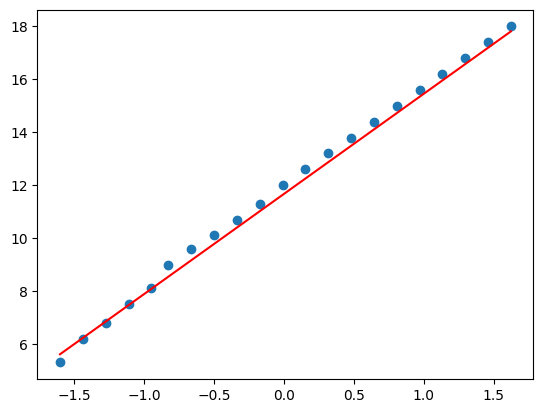

In [13]:
plt.scatter(X, y)
h_theta  = X@ theta[1]+theta[0]
plt.plot(X,  h_theta, color='red')

绘制损失函数

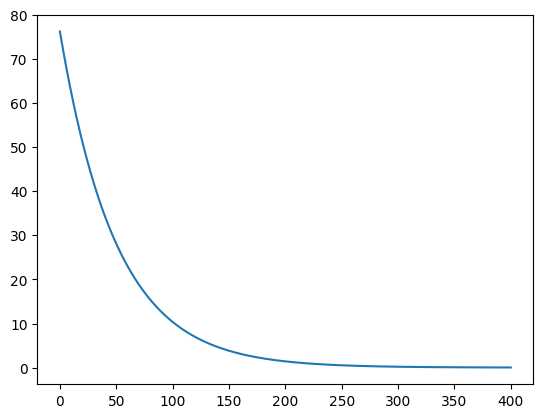

In [14]:
x_axis = np.linspace(0, num_iterations, num_iterations)
plt.plot(x_axis, costs)